In [306]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA

In [307]:
def plot_column(ax, column, df):
    if df[column].dtype == 'object':
        # Check if binary
        if df[column].nunique() == 2:
            # Binary data visualization
            df[column].value_counts().plot(kind='bar', ax=ax)
        else:
            # Categorical data visualization
            df[column].value_counts().plot(kind='pie', autopct='%1.1f%%', ax=ax)
    elif df[column].dtype == 'int64' or df[column].dtype == 'float64':
        # Numeric data visualization
        df[column].plot(kind='hist', bins=20, ax=ax)
    else:
        ax.text(0.5, 0.5, f"Unhandled data type for column: {column}", 
                fontsize=12, ha='center')
    ax.set_title(column)


In [308]:
def plot_column_data(df, column_name):
    # Check if the column exists in the DataFrame
    if column_name not in df.columns:
        print(f"Column '{column_name}' not found in DataFrame.")
        return
    
    # Get the data type of the column
    data_type = df[column_name].dtype
    
    # Plot the data based on the data type
    if data_type == 'int64' or data_type == 'float64':
        # Plot numerical data
        plt.figure(figsize=(8, 6))
        plt.hist(df[column_name], bins=20, color='skyblue', edgecolor='black')
        plt.title(f'Histogram of {column_name}')
        plt.xlabel(column_name)
        plt.ylabel('Frequency')
        plt.grid(True)
        plt.show()
    elif data_type == 'object':
        # Plot categorical data
        value_counts = df[column_name].value_counts()
        plt.figure(figsize=(8, 6))
        value_counts.plot(kind='bar', color='skyblue', edgecolor='black')
        plt.title(f'Bar plot of {column_name}')
        plt.xlabel(column_name)
        plt.ylabel('Frequency')
        plt.grid(True)
        plt.show()
    else:
        print(f"Data type '{data_type}' not supported for plotting.")

In [309]:
def read_files_in_directory(directory):

    file_paths = []
    for root, _, files in os.walk(directory):

        for file in files:
            if file[-3:] != "txt":
                file_path = os.path.join(root, file)
                file_paths.append(file_path)
    return file_paths
directory_path = "data/geneReadTest/"
files = read_files_in_directory(directory_path)

In [310]:
HS = ["ALDOA", "ANGPTL4" , "ANLN" , "BNC1" , 'C20orf20' , 'CA9' , 
      'CDKN3' , 'COL4A6' , 'DCBLD1' , 'ENO1' , 'FAM83B', 'FOSL1' , 
      'GNAI1' , 'HIG2' , 'KCTD11' , 'KRT17' , 'LDHA' , 'MPRS17' , 
      "P4HA1" 	, 'PGAM1' 	, 'PGK1' 	, 'SDC1' 	, 'SLC16A1' , 
      'SLC2A1', 'TPI1' 	, 'VEGFA']

IS = ["HLA-DQA1", "HLA-DQA2", "HLA-DRB5", "CTLA4", "PDCD1LG2", 
      'ICAM1', 'CD274', 'STAT1', 'IRF1', 'IFNG', 'GNLY', "TBX21", 
      "CCL5", "LAG3", "CD247", 'ICOS', 'IL18RAP', "CXCL9", "CXCL10", 
      "HLA-DPB1", 'HLA-DPA1', "HLA-DMB", 'HLA-DRA', 'HLA-DMA', 'CD80', 
      "HLA-DOA", "CD4"]
hypooxia_immue_signature = HS + IS

In [311]:
def extract_hypooxia_immue_signature(file):
    df = pd.read_csv(file, sep='\t',skiprows=1)
    filtered_df = df[df['gene_name'].isin(hypooxia_immue_signature)]
    gene_in_data = set(df['gene_name'])
    not_detected = set(hypooxia_immue_signature) - gene_in_data
    return filtered_df, not_detected

In [312]:
for file in files:
    df, not_detected = extract_hypooxia_immue_signature(file)
    print(not_detected)

{'HIG2', 'C20orf20', 'MPRS17'}
{'HIG2', 'C20orf20', 'MPRS17'}
{'HIG2', 'C20orf20', 'MPRS17'}
{'HIG2', 'C20orf20', 'MPRS17'}
{'HIG2', 'C20orf20', 'MPRS17'}
{'HIG2', 'C20orf20', 'MPRS17'}


{'HIG2', 'C20orf20', 'MPRS17'}
{'HIG2', 'C20orf20', 'MPRS17'}
{'HIG2', 'C20orf20', 'MPRS17'}


# Gene
| case_ID | gene_1 | gene_2 | .... | 
##### Case Id to be matched


In [313]:
def extract_tpm(file):
    df = pd.read_csv(file, sep='\t',skiprows=1)
    subset_df = df.iloc[4:, df.columns.isin(['tpm_unstranded', 'gene_id', 'gene_name'])]
    subset_df['header'] = subset_df['gene_id'] + '_' + subset_df['gene_name'] # Same genes, different id. multiple record
    transposed_df = subset_df[['header', 'tpm_unstranded']].T
    transposed_df.columns = transposed_df.loc['header']
    transposed_df = transposed_df.drop('header').reset_index(drop=True).sort_index(axis=1)
    return transposed_df

In [314]:
def merge_cases(files,extractor):
    merged = extractor(files[0])
    for file in files[1:]:
        to_be_merge = extractor(file)
        merged = pd.concat([to_be_merge, merged], axis=0, ignore_index=True)
    return merged
    

In [315]:
merge_gene_read = merge_cases(files,extract_tpm)


# Protein
| case_ID | protein_1 | protein_2 | .... |

In [316]:
# directory_path = "../data/Protein_Expression"
# files = read_files_in_directory(directory_path)

In [317]:
def get_case_id_from_filename(file):
    index = file.find("TCGA")
    return file[index:index+12]

In [318]:
def extract_protein_expression(file):
    df = pd.read_csv(file, sep='\t')
    subset_df = df[['protein_expression', 'AGID']]
    transposed_df = subset_df.set_index('AGID').T
    transposed_df = transposed_df.reset_index(drop=True)
    transposed_df.insert(0, 'case_submitter_id', [get_case_id_from_filename(file)])
    return transposed_df

In [319]:
merged_protein_expression = pd.read_csv('merged_protein_expression.csv')
merged_protein_expression.shape

(353, 488)

In [320]:
# merged_protein_expression = merge_cases(files,extract_protein_expression).sort_values(by='case_submitter_id')
# merged_protein_expression.to_csv('merged_protein_expression.csv',index=False)

In [321]:
def calculate_column_statistics(df):
    results = pd.DataFrame(index=df.columns, columns=['Mean', 'Variance', 'NumUniqueValues', 'NumNaNs'])
    for column in df.columns:
        if column not in ["case_submitter_id"]:
            results.at[column, 'Mean'] = df[column].mean()
            results.at[column, 'Variance'] = df[column].var()
            results.at[column, 'NumUniqueValues'] = df[column].nunique()
            results.at[column, 'NumNaNs'] = df[column].isna().sum()
    return results

In [322]:
pd.set_option('display.max_rows', 500)

In [323]:
statistics= calculate_column_statistics(merged_protein_expression)


In [324]:
def extract_rows_by_nan(df, nan_threshold=353):
    columns = [column for column in df.columns if df[column].isna().sum() == nan_threshold]
    return columns

In [325]:
statistics= calculate_column_statistics(merged_protein_expression)
statistics["NumNaNs"].unique()

array([nan, 0, 10, 353, 141, 280], dtype=object)

353 means the protein is missing in all cases, drop

In [326]:
empmpty_columns = extract_rows_by_nan(merged_protein_expression,353)
merged_protein_expression = merged_protein_expression.drop(columns=empmpty_columns)
merged_protein_expression.shape

(353, 470)

488-470 = 18: 18 protein is removed since they are empty

In [327]:
full_columns = extract_rows_by_nan(merged_protein_expression,0)
merged_protein_expression[full_columns].shape

(353, 218)

218/488 protein recorded in all 353 cases

In [328]:
def extract_rows_with_nan(df, columns):
    return df[df[columns].isnull().any(axis=1)]

In [329]:
columns_missing_10 = extract_rows_by_nan(merged_protein_expression,10)
merged_protein_expression[columns_missing_10].isna().any(axis=1).sum()

10

In [330]:
missing_rows=extract_rows_with_nan(merged_protein_expression,columns_missing_10)[["case_submitter_id"]+columns_missing_10]

Above 10 cases contains 240 missing values, too much missing and only 10, drop?

In [331]:
merged_protein_expression = merged_protein_expression.drop(missing_rows.index)
merged_protein_expression.shape

(343, 470)

In [332]:
calculate_column_statistics(merged_protein_expression)["NumNaNs"].unique()

array([nan, 0, 141, 270], dtype=object)

1 columns missing in 280 cases now 270

In [333]:
columns = extract_rows_by_nan(merged_protein_expression,270)
column = merged_protein_expression[columns]
calculate_column_statistics(column)

,Mean,Variance,NumUniqueValues,NumNaNs
AGID00332,0.753015,1.012533,73,270


In [334]:
merged_protein_expression = merged_protein_expression.drop(["AGID00332"],axis=1)
merged_protein_expression.shape


(343, 469)

In [335]:
calculate_column_statistics(merged_protein_expression)["NumNaNs"].unique()

array([nan, 0, 141], dtype=object)

In [336]:
columns = extract_rows_by_nan(merged_protein_expression,141)
merged_protein_expression[columns].shape


(343, 12)

12 columns 141 missing values, imputation?
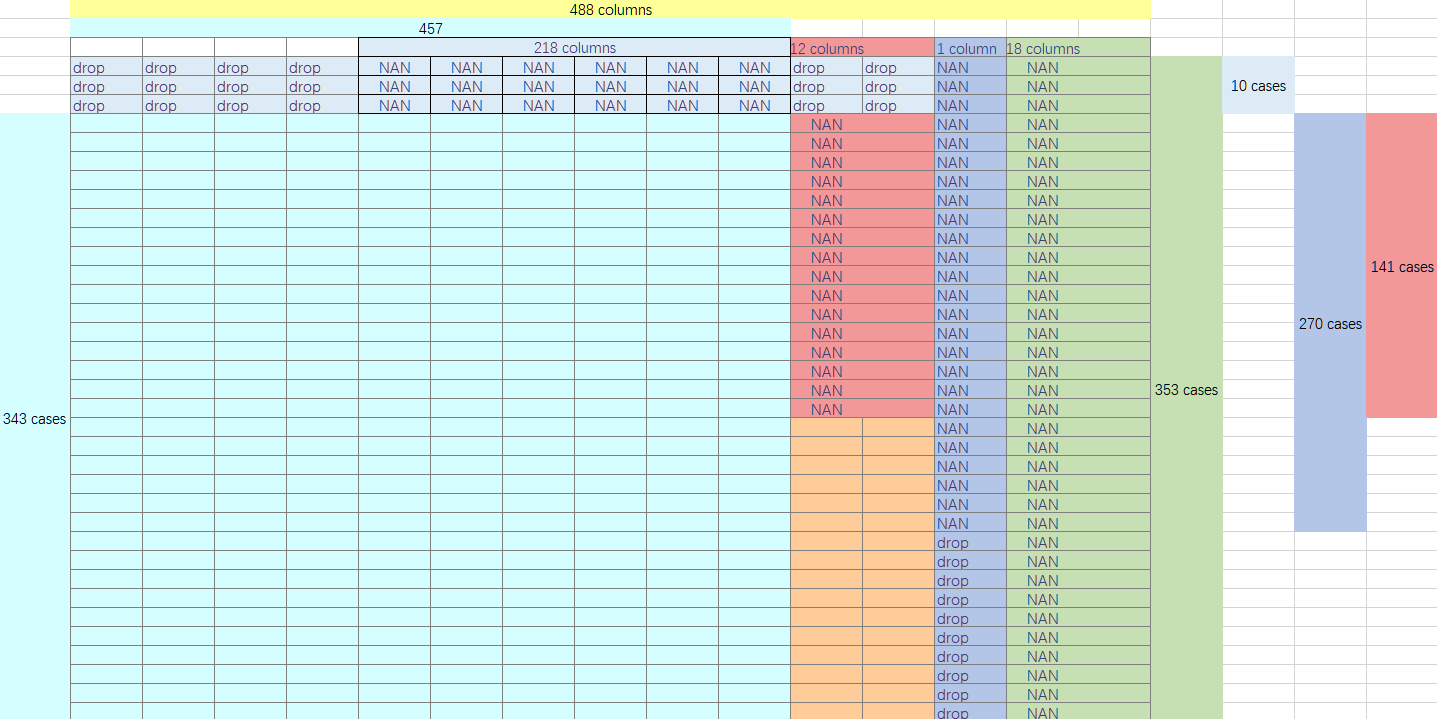

In [337]:
# medians = merged_protein_expression[columns].median()

# merged_protein_expression[columns] = merged_protein_expression[columns].fillna(medians)
# protein_expression_no_inputation = merged_protein_expression.drop(columns=columns, axis=1)
# print(merged_protein_expression.shape,protein_expression_no_inputation.shape)


In [338]:
path = "D:\\UCL\\Week14\\HSAE\\data\\clinical\\clinical.tsv"
df = pd.read_csv(path,sep='\t')

In [339]:
df['days_to_death'] = pd.to_numeric(df['days_to_death'], errors='coerce')

In [340]:
# df['days_to_last_follow_up'] = pd.to_numeric(df['days_to_last_follow_up'], errors='coerce')
# df['days_to_death'] = pd.to_numeric(df['days_to_death'], errors='coerce')
# df['days_to_diagnosis'] = pd.to_numeric(df['days_to_diagnosis'], errors='coerce')
# deceased_patients = df[df['vital_status'] == 'Dead']


In [341]:
# fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 30))
# fig.tight_layout(pad=5.0)


# for i, col in enumerate(merged_protein_expression):

#     plot_column(axes[i//4, i%4], col,df[["days_to_death"]])


# plt.show()

In [342]:
colums = ["case_submitter_id","age_at_index", "days_to_birth", "days_to_death", "ethnicity", "gender", "race", "vital_status", "age_at_diagnosis", "days_to_last_follow_up","year_of_diagnosis", "treatment_or_therapy","ajcc_pathologic_stage"]
deduplicate = df[df.index %2 !=0].sort_values(by='case_submitter_id')

In [343]:
merged_df_no_inputation = pd.merge(merged_protein_expression, deduplicate[["ajcc_pathologic_stage","days_to_death","case_submitter_id"]], on='case_submitter_id', how='inner')
merged_df_no_inputation["ajcc_pathologic_stage"].unique()

array(['Stage IVA', "'--", 'Stage II', 'Stage III', 'Stage I',
       'Stage IVB'], dtype=object)

In [344]:
def encode_stage_column(df, column_name):
    # Define mapping dictionary
    stage_mapping = {
        "Stage I": 0,
        "Stage II": 1,
        "Stage III": 2,
        "Stage IVA": 3,
        "Stage IVB": 4,
        "'--": -1
            }
    
    # Apply mapping to the column
    df[column_name] = df[column_name].map(stage_mapping)
    
    return df

In [345]:
merged_df_no_inputation = encode_stage_column(merged_df_no_inputation,"ajcc_pathologic_stage")

If ajcc_pathologic_stage is none plus the columns are null, no information on what median to map to, drop
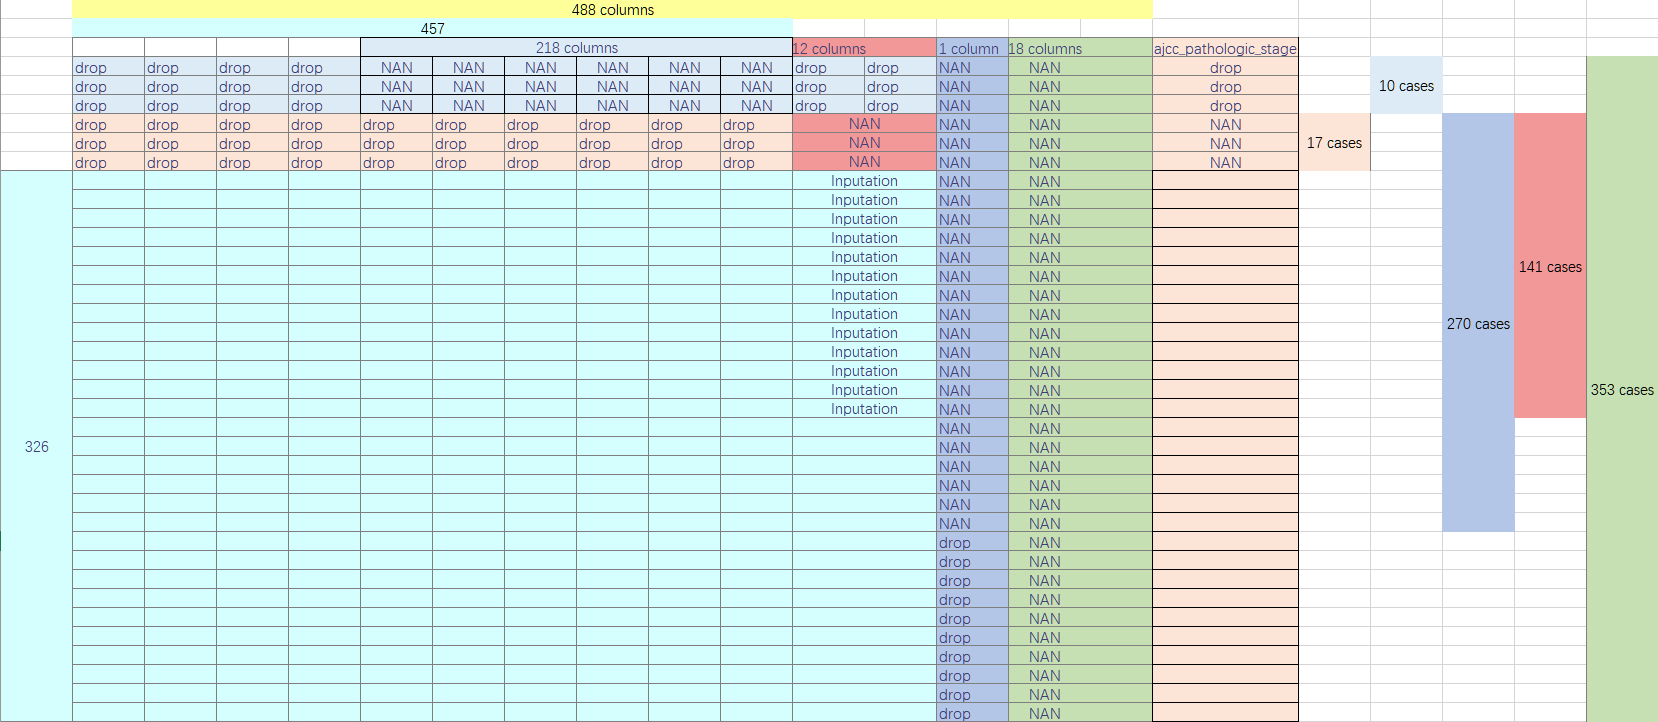

In [346]:
merged_df_no_inputation.shape

(343, 471)

In [347]:
def drop_rows(df, columns_to_check):
    all_nan = df[columns_to_check].isnull().all(axis=1)
    stage_minus_one = df["ajcc_pathologic_stage"] == -1
    to_drop = all_nan & stage_minus_one
    df = df[~to_drop]
    return df
merged_df_no_inputation = drop_rows(merged_df_no_inputation,columns)

In [348]:
merged_df_no_inputation.shape

(326, 471)

In [349]:
def impute_missing_with_group_median(merged_df_no_inputation, reference_column, columns_to_impute):

    for col in columns_to_impute:

        median_values = merged_df_no_inputation.groupby(reference_column)[col].median()

        for index, row in merged_df_no_inputation[merged_df_no_inputation[col].isnull()].iterrows():

            
            label_value = row[reference_column]

            merged_df_no_inputation.at[index, col] = median_values[label_value]
    return merged_df_no_inputation

In [350]:
merged_df = impute_missing_with_group_median(merged_df_no_inputation,"ajcc_pathologic_stage",columns)

In [351]:
def contain_nan(df,col):
    if df[col].isna().any():
        return True
    return False

In [352]:
for col in columns:
    print(contain_nan(merged_df,col))

False
False
False
False
False
False
False
False
False
False
False
False


In [353]:
merged_df.to_csv('protein_expression.csv',index=False)


In [395]:
merged_df = pd.read_csv('protein_expression.csv')


AE

In [396]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split

In [397]:
merged_df = merged_df.drop('case_submitter_id', axis=1)
merged_df = merged_df.drop('ajcc_pathologic_stage', axis=1)
other = merged_df.columns.drop("days_to_death")
X_train, X_test, y_train, y_test = train_test_split(merged_df[other], merged_df["days_to_death"],
                                                    train_size=0.75,
                                                    random_state=1)

In [398]:
merged_df_no_inputation = merged_df.drop(columns, axis=1)
other = merged_df_no_inputation.columns.drop("days_to_death")
X_train_no_inputation, X_test_no_inputation, y_train_no_inputation, y_test_no_inputation = train_test_split(merged_df_no_inputation[other], merged_df_no_inputation["days_to_death"],
                                                    train_size=0.75,
                                                    random_state=1)

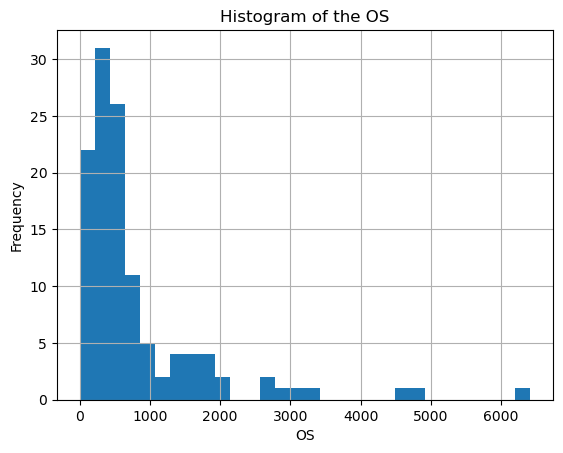

In [399]:
y_train.hist(bins=30) 
plt.xlabel('OS')
plt.ylabel('Frequency')
plt.title('Histogram of the OS')
plt.show()

survice timespan: 
1. 0-1
2. 1-3
3. 3-5
4. 5-10
5. 10-20
6. >20 /alive

In [400]:
# Number of features in your dataset
n_features = len(X_train.columns) 


input_layer = Input(shape=(n_features,))
encoder = Dense(64, activation='relu')(input_layer)
encoder = Dense(32, activation='relu')(encoder)


bottleneck = Dense(6, activation='relu')(encoder)  

# Define the decoder (mirror the encoder)
decoder = Dense(32, activation='relu')(bottleneck)
decoder = Dense(64, activation='relu')(decoder)
encoder_model= Model(inputs=input_layer, outputs=bottleneck)

# Output layer
output_layer = Dense(n_features, activation='sigmoid')(decoder) 

# Define the autoencoder model
autoencoder = Model(inputs=input_layer, outputs=output_layer)

# Compile the autoencoder
autoencoder.compile(optimizer='adam', loss='mse')

In [401]:
history = autoencoder.fit(X_train, X_train,  # The target is the input data itself
                epochs=100,
                batch_size=16,
                shuffle=True,
                validation_data=(X_test, X_test))

Epoch 1/100
16/16 [==============================] - 1s 18ms/step - loss: 0.5912 - val_loss: 0.4804
Epoch 2/100
16/16 [==============================] - 0s 4ms/step - loss: 0.3780 - val_loss: 0.3601
Epoch 3/100
16/16 [==============================] - 0s 4ms/step - loss: 0.3403 - val_loss: 0.3573
Epoch 4/100
16/16 [==============================] - 0s 4ms/step - loss: 0.3378 - val_loss: 0.3545
Epoch 5/100
16/16 [==============================] - 0s 5ms/step - loss: 0.3356 - val_loss: 0.3518
Epoch 6/100
16/16 [==============================] - 0s 6ms/step - loss: 0.3337 - val_loss: 0.3503
Epoch 7/100
16/16 [==============================] - 0s 5ms/step - loss: 0.3322 - val_loss: 0.3489
Epoch 8/100
16/16 [==============================] - 0s 4ms/step - loss: 0.3297 - val_loss: 0.3461
Epoch 9/100
16/16 [==============================] - 0s 4ms/step - loss: 0.3274 - val_loss: 0.3448
Epoch 10/100
16/16 [==============================] - 0s 4ms/step - loss: 0.3255 - val_loss: 0.3429
Epoch 11

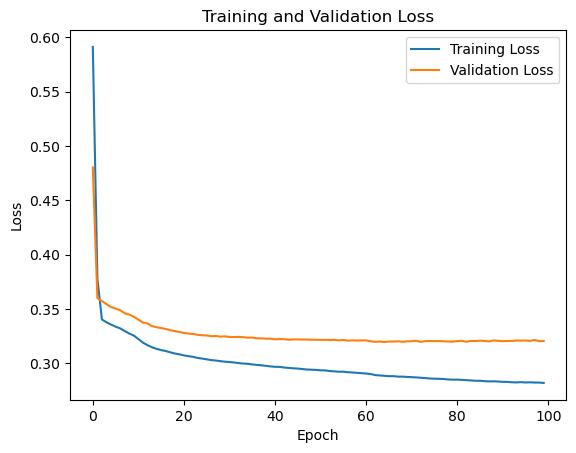

In [402]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

In [403]:
# Number of features in your dataset
n_features = len(X_train_no_inputation.columns) 


input_layer = Input(shape=(n_features,))
encoder = Dense(64, activation='relu')(input_layer)
encoder = Dense(32, activation='relu')(encoder)


bottleneck = Dense(6, activation='relu')(encoder)  
encoder_model_noIpt = Model(inputs=input_layer, outputs=bottleneck)

# Define the decoder (mirror the encoder)
decoder = Dense(32, activation='relu')(bottleneck)
decoder = Dense(64, activation='relu')(decoder)

# Output layer
output_layer = Dense(n_features, activation='sigmoid')(decoder) 

# Define the autoencoder model
autoencoder_noIpt = Model(inputs=input_layer, outputs=output_layer)

# Compile the autoencoder
autoencoder_noIpt.compile(optimizer='adam', loss='mse')

In [404]:
history_noIpt =autoencoder_noIpt.fit(X_train_no_inputation, X_train_no_inputation,  # The target is the input data itself
                epochs=100,
                batch_size=16,
                shuffle=True,
                validation_data=(X_test_no_inputation, X_test_no_inputation))

Epoch 1/100
16/16 [==============================] - 1s 17ms/step - loss: 0.6039 - val_loss: 0.5151
Epoch 2/100
16/16 [==============================] - 0s 4ms/step - loss: 0.3982 - val_loss: 0.3643
Epoch 3/100
16/16 [==============================] - 0s 3ms/step - loss: 0.3425 - val_loss: 0.3599
Epoch 4/100
16/16 [==============================] - 0s 3ms/step - loss: 0.3395 - val_loss: 0.3567
Epoch 5/100
16/16 [==============================] - 0s 3ms/step - loss: 0.3365 - val_loss: 0.3538
Epoch 6/100
16/16 [==============================] - 0s 3ms/step - loss: 0.3339 - val_loss: 0.3506
Epoch 7/100
16/16 [==============================] - 0s 3ms/step - loss: 0.3310 - val_loss: 0.3493
Epoch 8/100
16/16 [==============================] - 0s 4ms/step - loss: 0.3291 - val_loss: 0.3476
Epoch 9/100
16/16 [==============================] - 0s 4ms/step - loss: 0.3280 - val_loss: 0.3466
Epoch 10/100
16/16 [==============================] - 0s 4ms/step - loss: 0.3268 - val_loss: 0.3453
Epoch 11

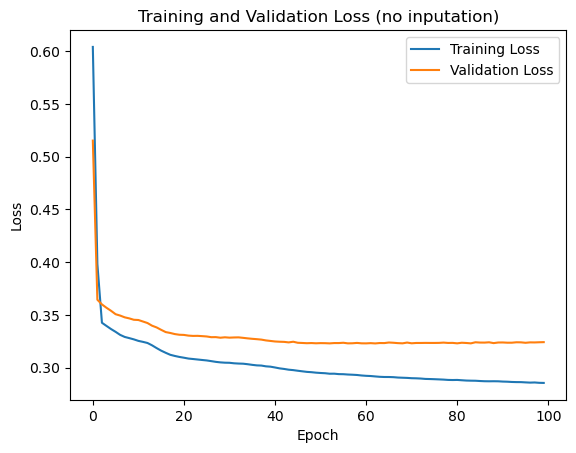

In [405]:
plt.plot(history_noIpt.history['loss'], label='Training Loss')
plt.plot(history_noIpt.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss (no inputation)')
plt.legend()
plt.show()

In [406]:
def map_years_to_group(value):
    years = value / 365
    if years <= 1:
        return 0
    elif 1 < years <= 3:
        return 1
    elif 3 < years <= 5:
        return 2
    elif 5 < years <= 10:
        return 3
    elif 10 < years <= 20:
        return 4
    else:  # years > 20 or alive which is nan in y
        return 5
y_test_no_inputation = y_test_no_inputation.apply(map_years_to_group)
y_test = y_test.apply(map_years_to_group)
encoded_no_inputation = encoder_model_noIpt.predict(X_test_no_inputation)
encoded_protein = encoder_model.predict(X_test)

3/3 [==============================] - 0s 1ms/step


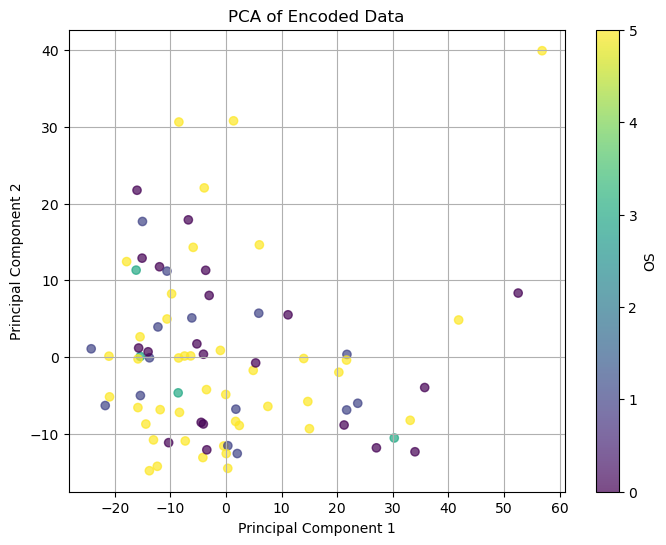

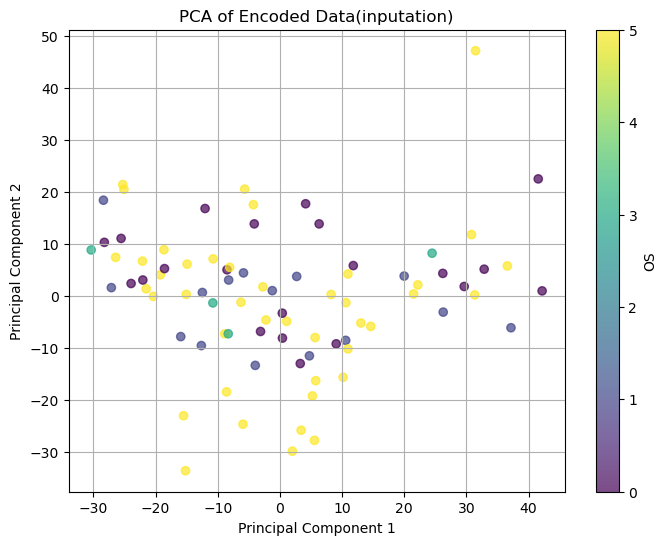

In [407]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)  # Reduce to 2 dimensions
reduced_data_no_inputation = pca.fit_transform(encoded_no_inputation)
reduced_data = pca.fit_transform(encoded_protein)
def plot_pca(reduced_data,inputation,labelc):
    x = reduced_data[:, 0]
    y = reduced_data[:, 1]
    plt.figure(figsize=(8, 6))
    scatter = plt.scatter(x, y, c=labelc, cmap='viridis', alpha=0.7)
    plt.title('PCA of Encoded Data'+inputation)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.colorbar(scatter, label='OS')
    plt.grid(True)
    plt.show()
plot_pca(reduced_data_no_inputation,"",y_test_no_inputation)
plot_pca(reduced_data,"(inputation)",y_test)

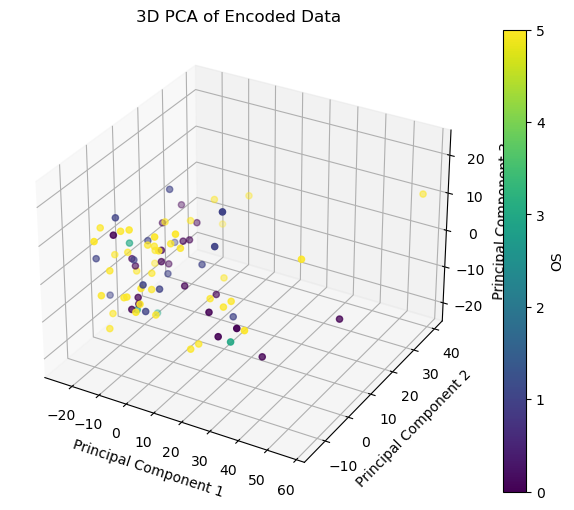

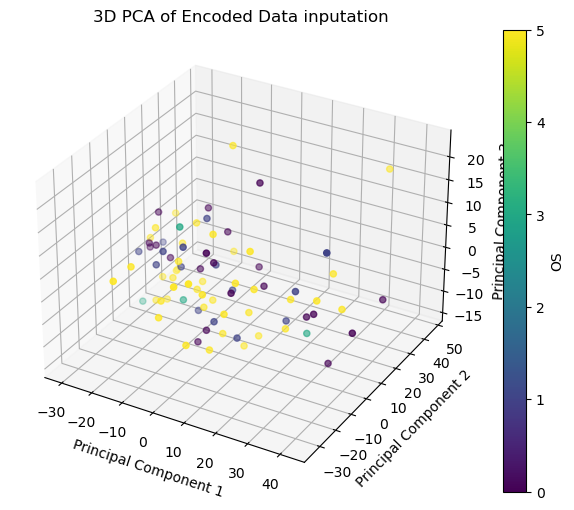

In [408]:
pca = PCA(n_components=3)  # Reduce to 3 dimensions
reduced_data_no_inputation = pca.fit_transform(encoded_no_inputation)
reduced_data = pca.fit_transform(encoded_protein)

def plot_3d_pca(reduced_data,inputation,labelc):
# The first and second PCA components will serve as your x and y axes
    x = reduced_data[:, 0]
    y = reduced_data[:, 1]
    z = reduced_data[:, 2]
    fig =plt.figure(figsize=(8, 6))

    ax = fig.add_subplot(111, projection='3d')
    scatter = ax.scatter(x, y, z, c=labelc, cmap='viridis', depthshade=True)
    ax.set_title('3D PCA of Encoded Data '+inputation)
    ax.set_xlabel('Principal Component 1')
    ax.set_ylabel('Principal Component 2')
    ax.set_zlabel('Principal Component 3')
    plt.colorbar(scatter, label='OS')
    plt.show()
plot_3d_pca(reduced_data_no_inputation,"", y_test_no_inputation)
plot_3d_pca(reduced_data,"inputation",y_test)

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
import matplotlib.pyplot as plt
import seaborn as sns

8/8 [==============================] - 0s 992us/step
              precision    recall  f1-score   support

           0       0.25      0.05      0.08        21
           1       0.17      0.13      0.15        15
           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00         0
           5       0.52      0.81      0.64        42

    accuracy                           0.45        82
   macro avg       0.19      0.20      0.17        82
weighted avg       0.36      0.45      0.37        82



c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_cla

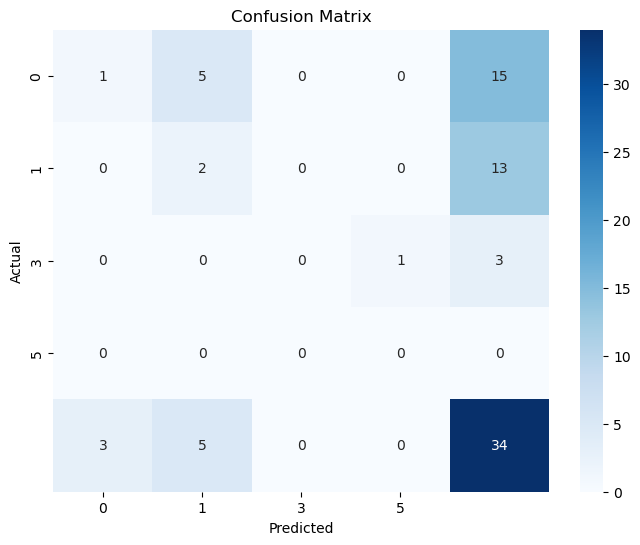

In [434]:
from sklearn.ensemble import RandomForestClassifier


RF_X_train = encoder_model.predict(X_train)  
RF_y_train = y_train.apply(map_years_to_group)

# Splitting the dataset into training and testing sets

# Initializing the Random Forest classifier with 100 trees
clf = RandomForestClassifier(n_estimators=100, random_state=0)

# Fitting the classifier to the training data
clf.fit(RF_X_train, RF_y_train)

# Making predictions on the test set
y_pred = clf.predict(encoded_protein)


# Assuming y_test and y_pred are your true labels and predicted labels respectively
cm = confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))
# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()



0,1,3,5 since in test set it does not contains 2, either in the prediction

8/8 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.12      0.05      0.07        21
           1       0.33      0.33      0.33        15
           3       0.00      0.00      0.00         4
           5       0.54      0.76      0.63        42

    accuracy                           0.46        82
   macro avg       0.25      0.29      0.26        82
weighted avg       0.37      0.46      0.40        82



c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


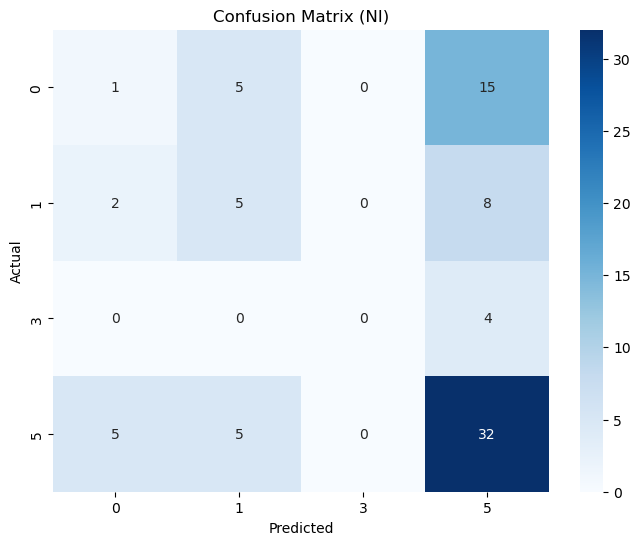

In [426]:
RF_X_train = encoder_model_noIpt.predict(X_train_no_inputation)  
RF_y_train = y_train_no_inputation.apply(map_years_to_group)

# Splitting the dataset into training and testing sets

# Initializing the Random Forest classifier with 100 trees
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Fitting the classifier to the training data
clf.fit(RF_X_train, RF_y_train)

# Making predictions on the test set
y_pred = clf.predict(encoded_no_inputation)

cm = confusion_matrix(y_test_no_inputation, y_pred)
print(classification_report(y_test_no_inputation, y_pred))
# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_test_no_inputation), yticklabels=np.unique(y_test_no_inputation))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (NI)')
plt.show()


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Classification Report:
              precision    recall  f1-score   support

           0       0.24      0.24      0.24        21
           1       0.21      0.33      0.26        15
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00         0
           5       1.00      0.02      0.05        42

    accuracy                           0.13        82
   macro avg       0.24      0.10      0.09        82
weighted avg       0.61      0.13      0.13        82



c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


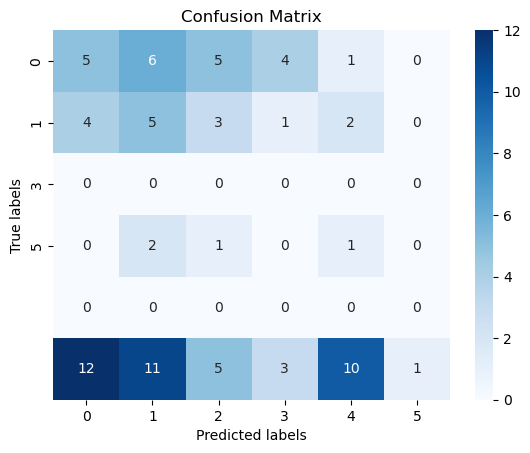

In [435]:
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix
import seaborn as sns
KM_X_train = encoder_model_noIpt.predict(X_train)  
KM_y_train = y_train.apply(map_years_to_group)
# Number of clusters - assuming you want as many as your known classes
num_clusters = 6
# Perform K-means clustering on the PCA output
kmeans = KMeans(n_clusters=num_clusters, random_state=0)
cluster_labels = kmeans.fit_predict(KM_X_train)  # Use your 2D or 3D PCA-reduced data here


print("Classification Report:")
print(classification_report(KM_y_train, cluster_labels))
conf_mat = confusion_matrix(KM_y_train, cluster_labels)

# Plotting the confusion matrix
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=range(num_clusters), yticklabels=np.unique(KM_y_train))
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


Result not ideal at all, both shown by the prediction resutl and the pca result.
Try supervised:

3/3 [==============================] - 0s 1ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.14      0.08      0.10        13
           1       0.12      0.05      0.07        19
           2       0.00      0.00      0.00         4
           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00         1
           5       0.54      0.83      0.65        46

    accuracy                           0.47        86
   macro avg       0.13      0.16      0.14        86
weighted avg       0.34      0.47      0.38        86



c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


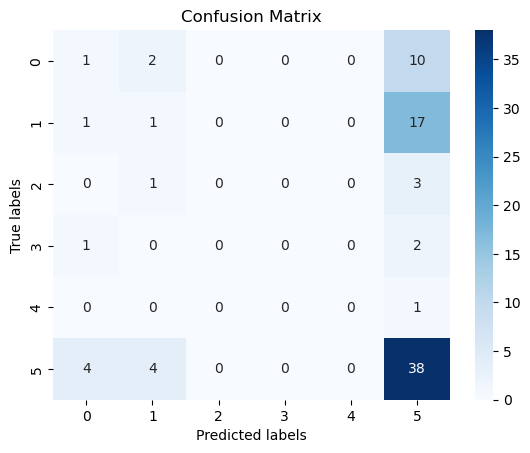

In [189]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

X_train = encoder_model_noIpt.predict(X_train_no_inputation)  # Your PCA-reduced features
y_train= y_train_no_inputation  # Your class labels
X_test = encoder_model_noIpt.predict(X_test_no_inputation)
y_test = y_test_no_inputation.apply(map_years_to_group)
labels = [0,1,2,3,4,5]
# Splitting the dataset into training and testing sets

# Initializing the Random Forest classifier with 100 trees
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Fitting the classifier to the training data
clf.fit(X_train, y_train)

# Making predictions on the test set
y_pred = clf.predict(X_test)

# Evaluating the classifier
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_mat = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(labels), yticklabels=np.unique(labels))
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


1. normalized by dividing the expression values by the sum of expression values of the analyzed genes for each sample
2. log2 transformed
3. z-scores were calculated
4. using Spearman distance and Ward criterion Cluster analyses
5. plot heatmaps using the z-score values matrix for color intensities.
6. Cox regression analyses using Kaplan–Meier curves to compare the three highest hierarchical sample groups on each heatmap
7. Cox regression multivariate was used to calculate the combined effect of HPV status and heatmap groups (Survival package in R)


https://docs.gdc.cancer.gov/Data/Bioinformatics_Pipelines/Expression_mRNA_Pipeline/
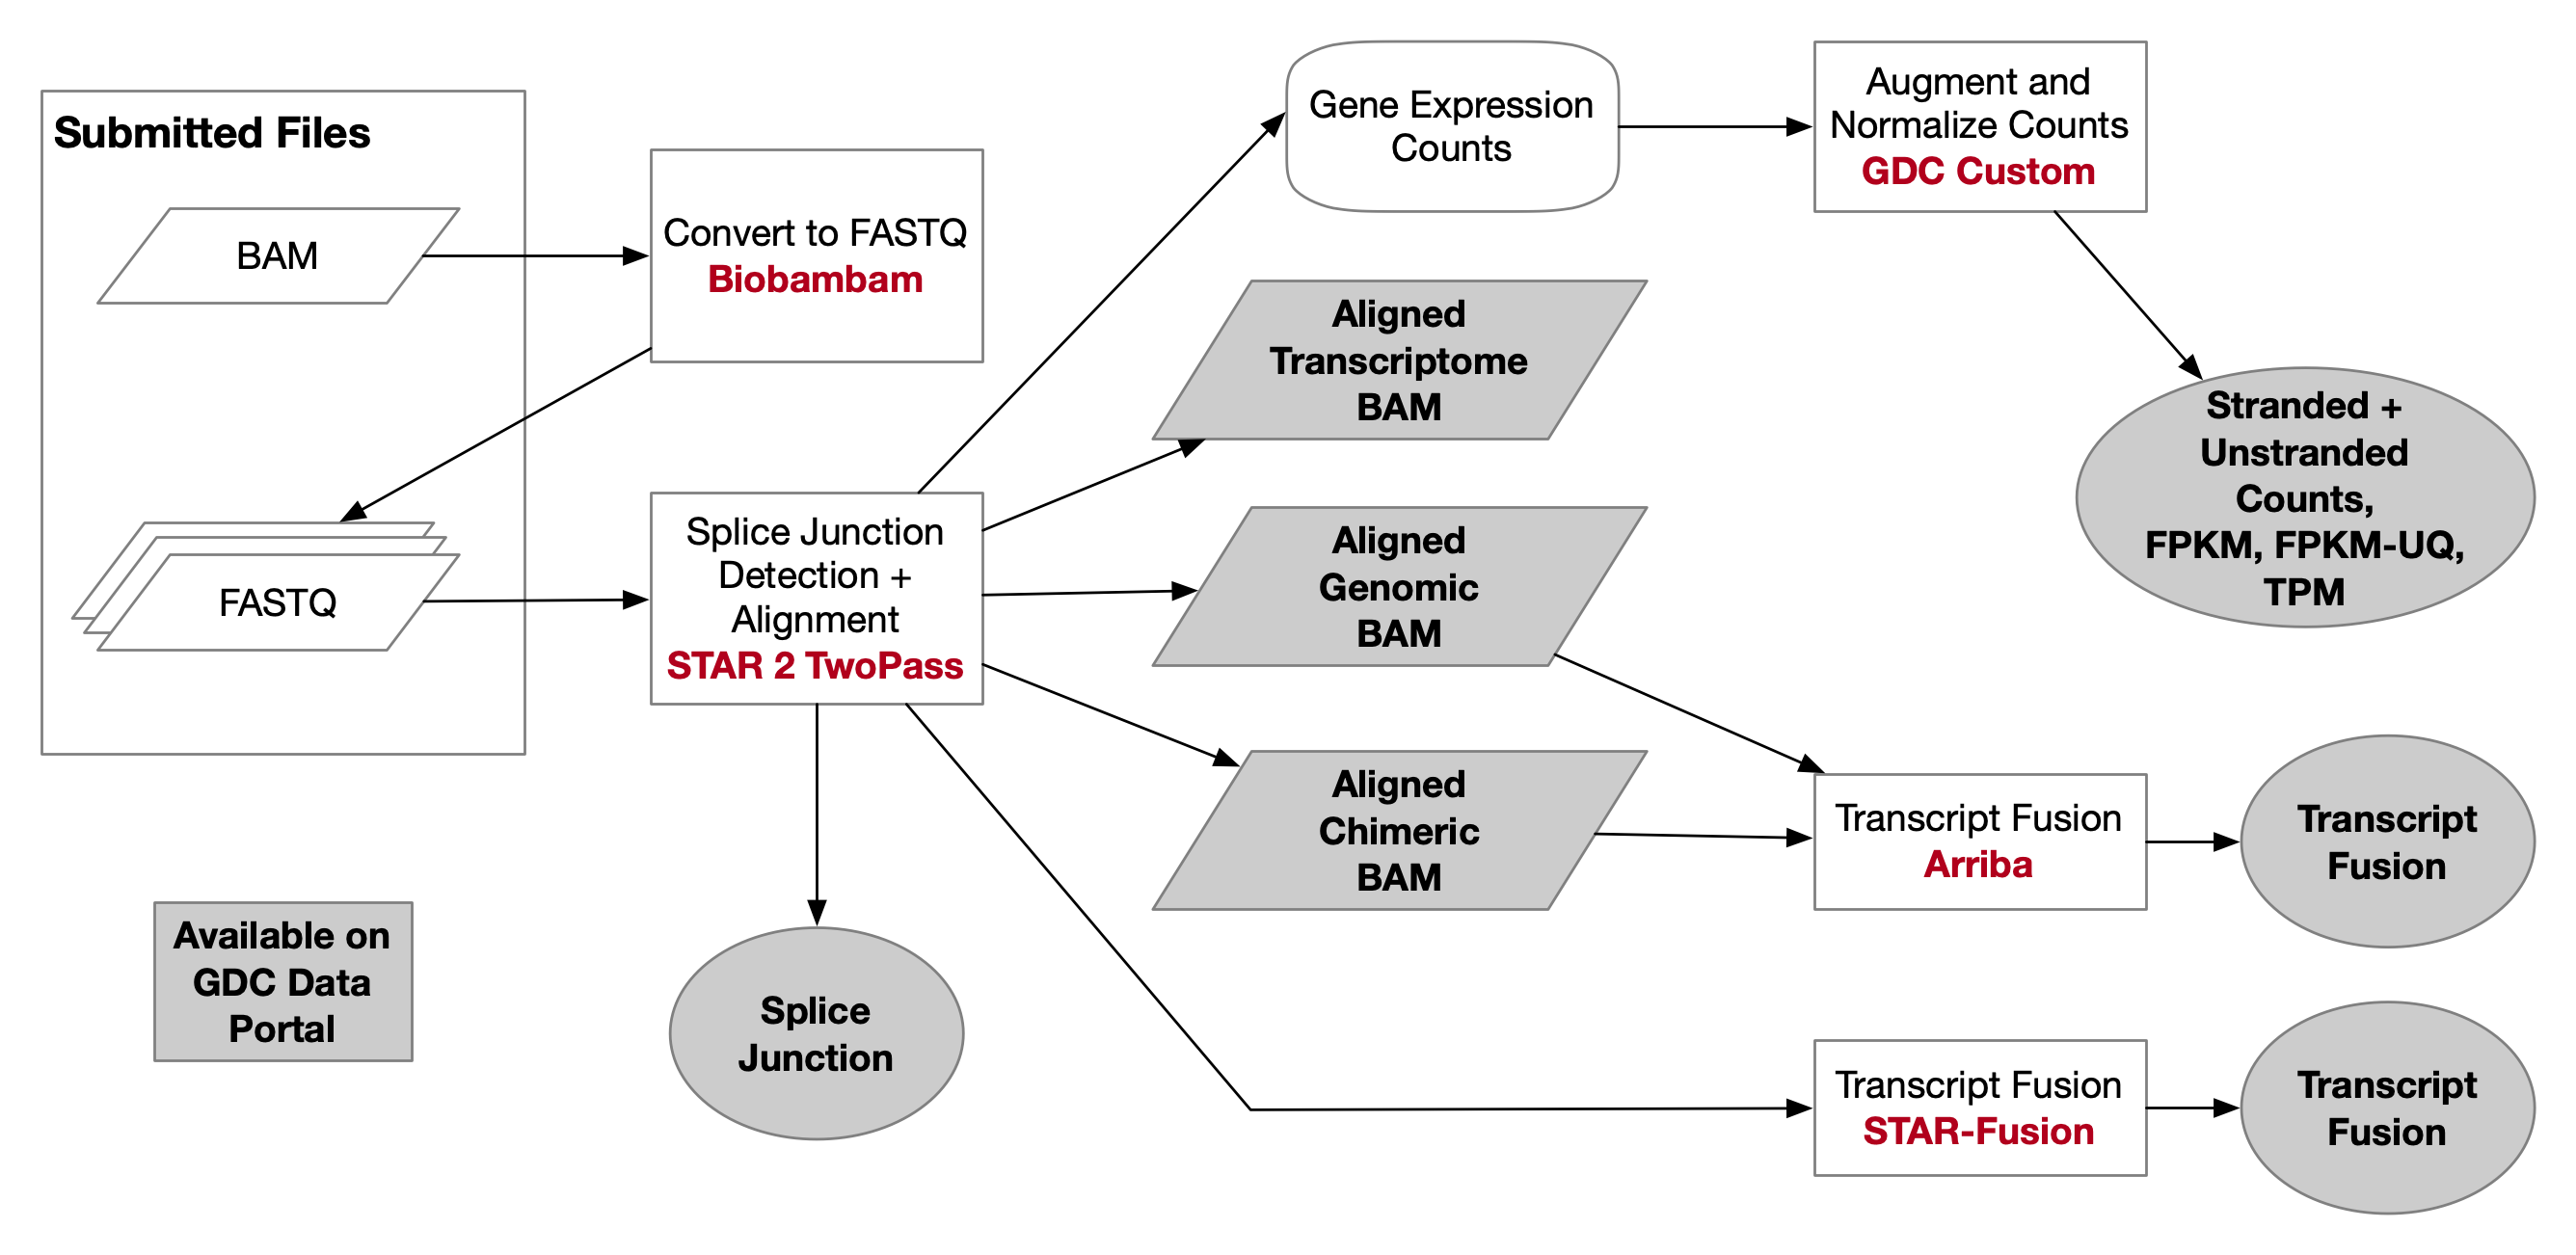
| unstranded | stranded_first |  stranded_second | tpm_unstranded | fpkm_unstranded | fpkm_uq_unstranded |

To deduce the hypoxia status, an algorithm of t-distributed Stochastic Neighbor Embedding (t-SNE) was applied [19]. t-SNE, a nonparametric, unsupervised method, can divide or condense patients into several distinct clusters, based on given signatures or hallmarks. The hallmark gene sets of hypoxia including 200 genes, were downloaded from the Molecular Signatures Database (MSigDB version 6.0). Further, expression changes of target genes involved in HIF-1 signaling pathway were analyzed between the hypoxiahigh and hypoxialow groups to explore their association with hypoxia. These targets were retrieved from the Kyoto Encyclopedia of Genes and Genomes (KEGG) database (https://www.kegg.jp/; ID:04066), including 15 genes involved in “Increase oxygen delivery” and 11 genes related to “Reduce oxygen consumption”. 
The limma algorithm was used to identify differentially expressed genes (DEGs) between the two groups [20]. Genes with a false discovery rate (FDR) adjusted p-value < 0.0001 and an absolute value of log2 (fold change) > 1 were considered as hypoxia-related DEGs.
limma algorithm
https://translational-medicine.biomedcentral.com/articles/10.1186/s12967-020-02366-0
https://academic.oup.com/bib/article/22/6/bbab173/6273240?login=true

The predefined gene sets included in our research were acquired from the Molecular Signatures Database (MSigDB; https://www.gsea-msigdb.org/gsea/msigdb/index.jsp) (44). We used the terms “lactic” and “hypoxia” as the search keywords in the MSigDB database.  After deleting duplicates, 284 LMRGs and 493 HRGs were identified for subsequent analysis [Table S2].
We analyzed differentially expressed genes (DEGs) using the R package “edgeR” in R (| log2 fold change [FC]|>1 and P < 0.05). We then identified differentially expressed LMRGs (DELMRGs) and HRGs (DEHRGs) by intersecting DEGs with LMRGs and HRGs
https://www.frontiersin.org/journals/immunology/articles/10.3389/fimmu.2022.998140/full

MSigDB
Weighted gene co-expression network analysis (WGCNA) was used to construct a scale-free co-expression network using the R package 'WGCNA' and to identify a gene module which is mostly correlated with hypoxia [38]. 
https://www.thno.org/v11p5061.htm